In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving data..csv to data. (1).csv


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
 # Replace with the correct file path
data = pd.read_csv(r"/content/data..csv")


In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [10]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Cluster
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,1.451670
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.767886
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,1.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,2.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,2.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


In [11]:
data.shape

(569, 33)

In [12]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [14]:
# Drop irrelevant columns
data_processed = data.drop(columns=['id', 'diagnosis'])

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)

In [15]:
# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

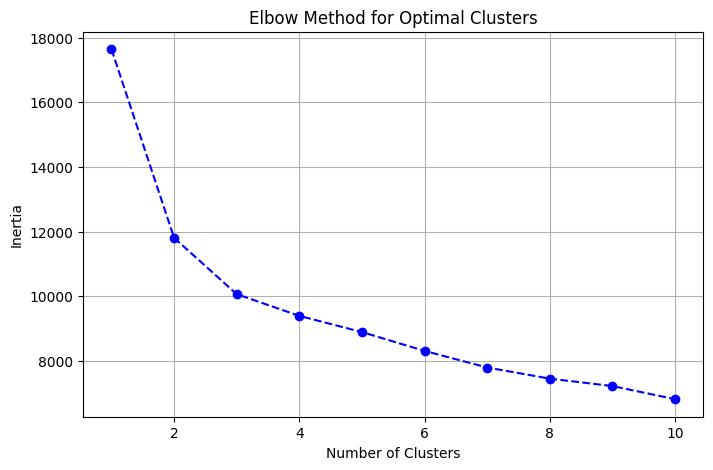

In [16]:
# the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [17]:
# the optimal number of clusters based on the elbow method
optimal_clusters = 3  # based on the elbow curve

# K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

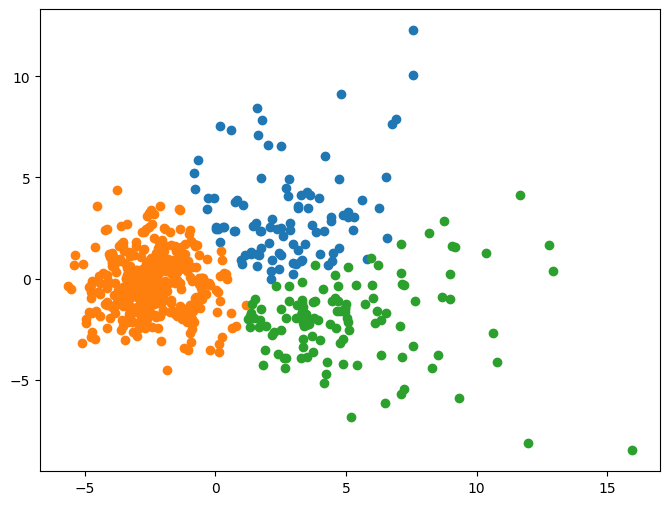

In [18]:
from sklearn.decomposition import PCA
# Reducing the dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Ploting clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = data_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

In [19]:

# Filtering out only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Adding the Cluster column to the filtered data for grouping
numeric_data['Cluster'] = data['Cluster']

# Calculating detailed statistics for each cluster
detailed_stats = numeric_data.groupby('Cluster').agg(['mean', 'min', 'max', 'std'])

# Display the statistics
detailed_stats

# Export the detailed statistics to a CSV file for further review
detailed_stats.to_csv('cluster_detailed_statistics.csv')


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Use 'Cluster' as the target and original features as input
features = data_processed
target = data['Cluster']

# Fit a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(features, target)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance)


                    Feature  Importance
30                  Cluster    0.249391
6            concavity_mean    0.134140
27     concave_points_worst    0.062315
22          perimeter_worst    0.061355
13                  area_se    0.054378
23               area_worst    0.052058
0               radius_mean    0.048241
20             radius_worst    0.045582
7       concave_points_mean    0.039523
3                 area_mean    0.037448
5          compactness_mean    0.037247
29  fractal_dimension_worst    0.023252
25        compactness_worst    0.020577
2            perimeter_mean    0.019975
26          concavity_worst    0.016206
10                radius_se    0.013720
12             perimeter_se    0.013637
9    fractal_dimension_mean    0.013330
19     fractal_dimension_se    0.011359
16             concavity_se    0.008521
17        concave_points_se    0.008379
15           compactness_se    0.007013
28           symmetry_worst    0.004761
24         smoothness_worst    0.004454


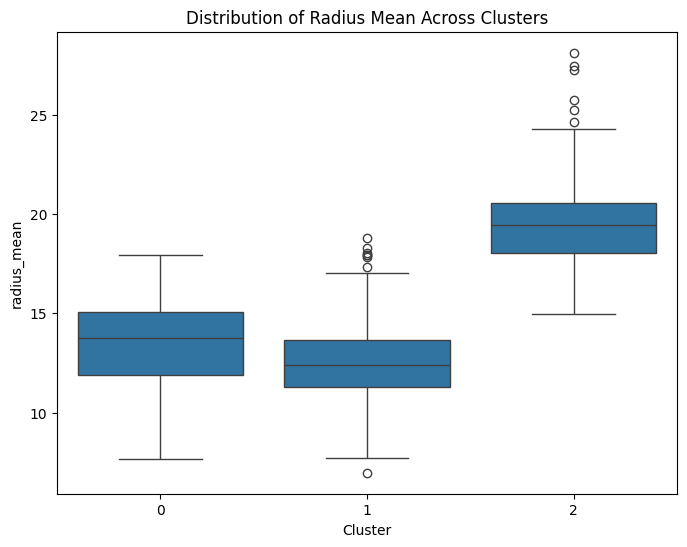

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='radius_mean', data=data)
plt.title('Distribution of Radius Mean Across Clusters')
plt.show()

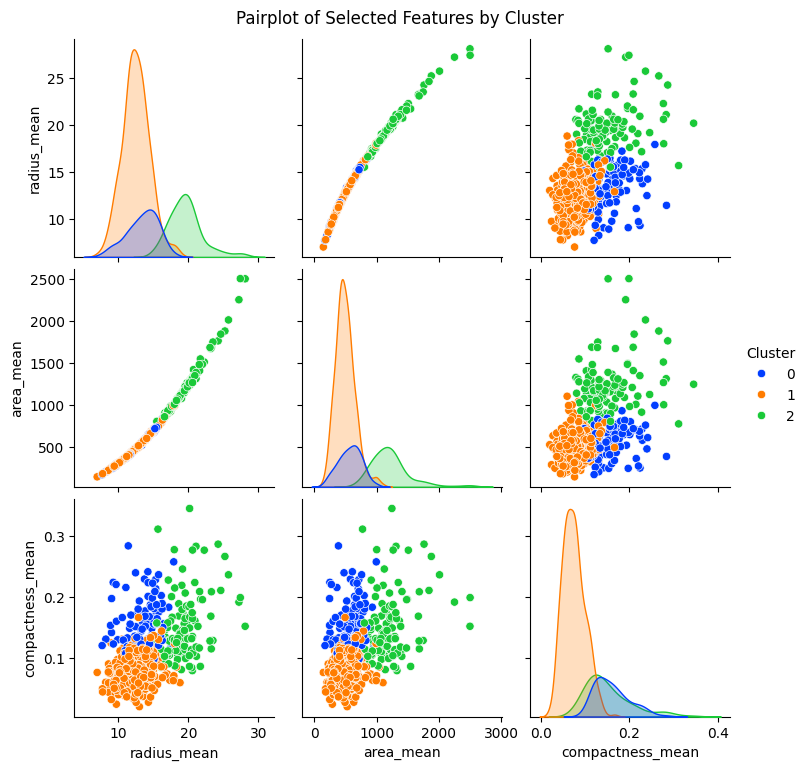

In [22]:
# Pairplot for selected features, grouped by cluster
selected_features = ['radius_mean', 'area_mean', 'compactness_mean']  # Adjust features based on your dataset
sns.pairplot(data, vars=selected_features, hue='Cluster', palette='bright')
plt.suptitle('Pairplot of Selected Features by Cluster', y=1.02)
plt.show()

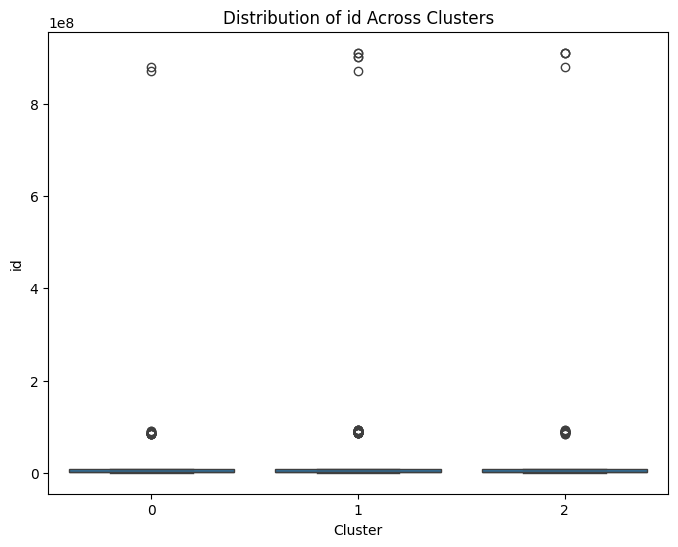

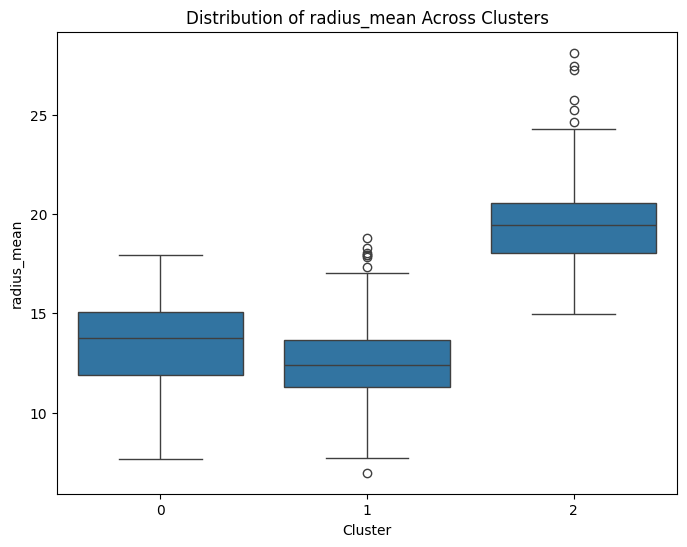

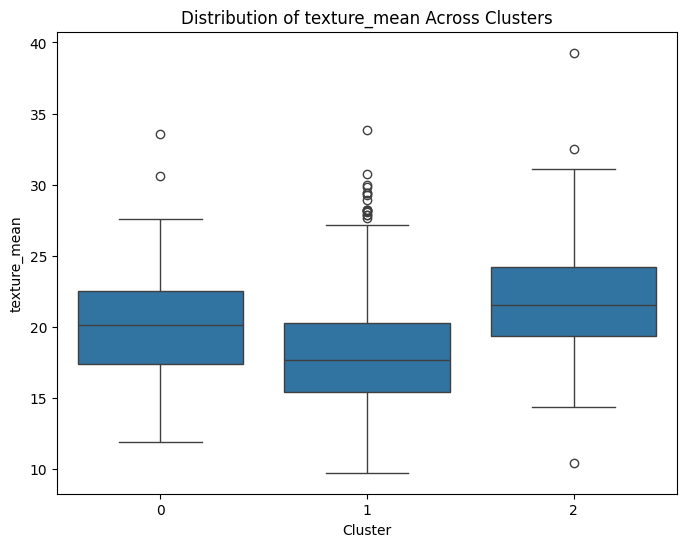

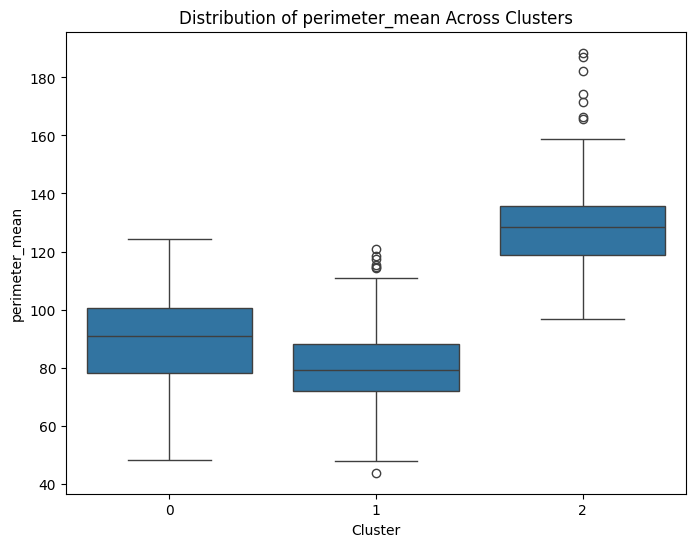

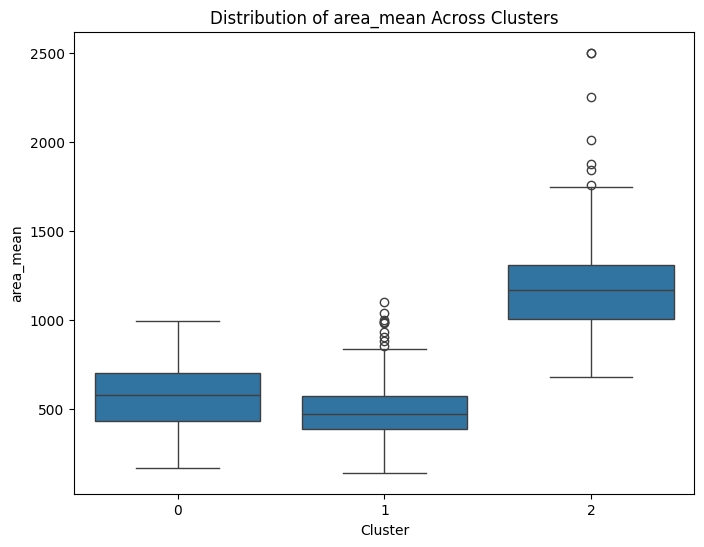

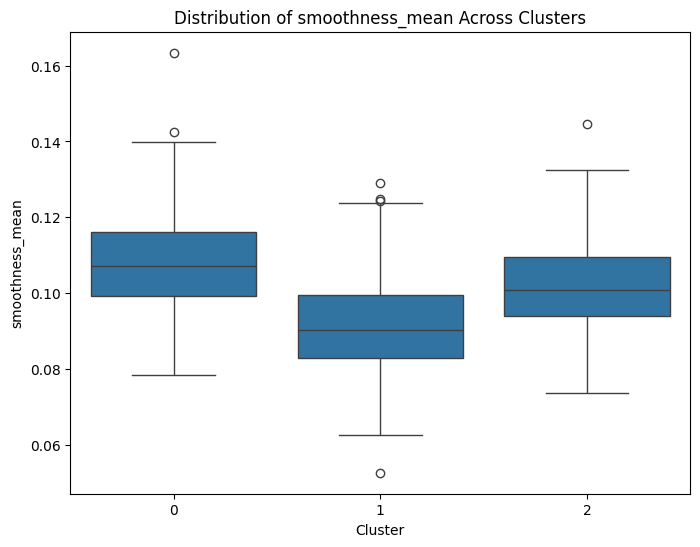

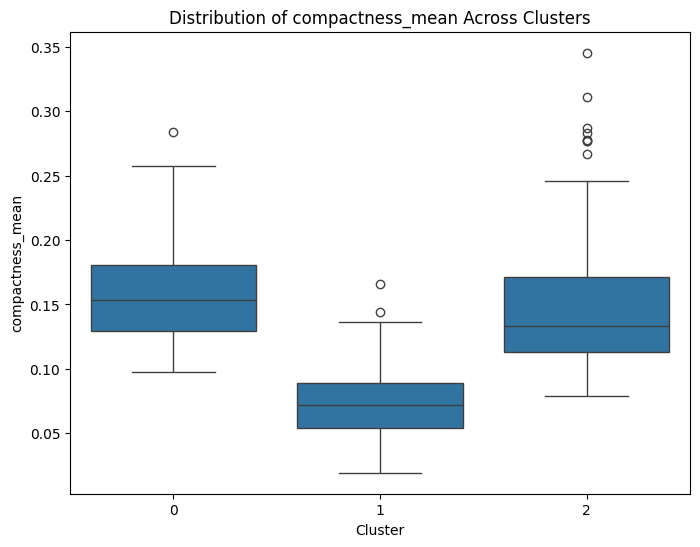

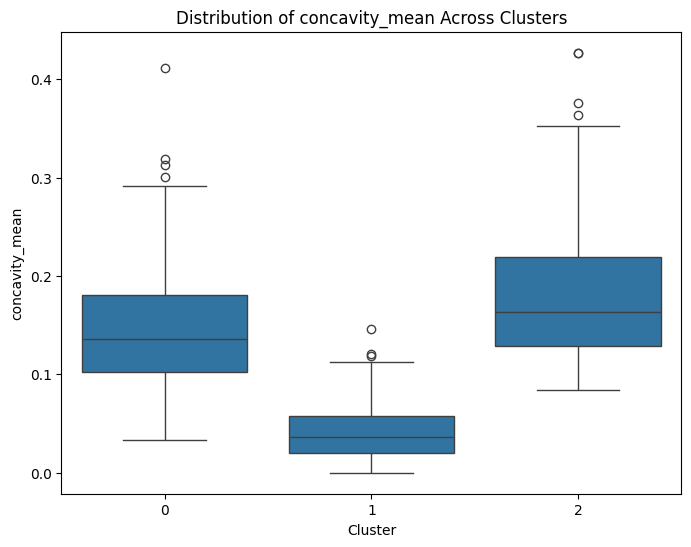

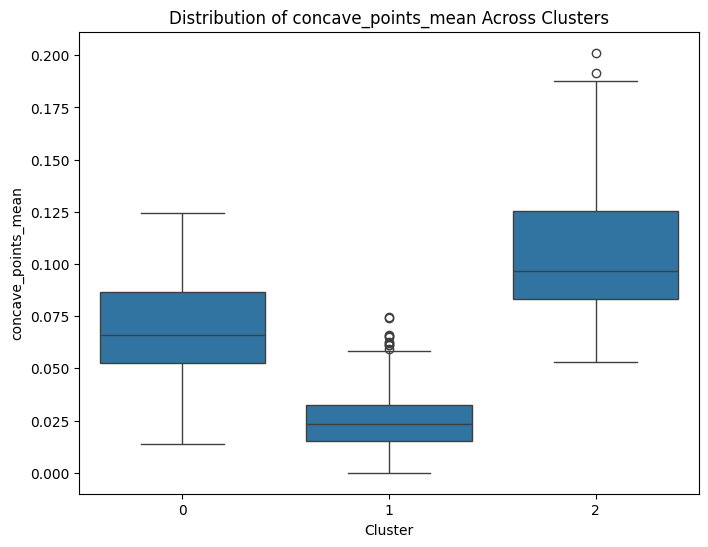

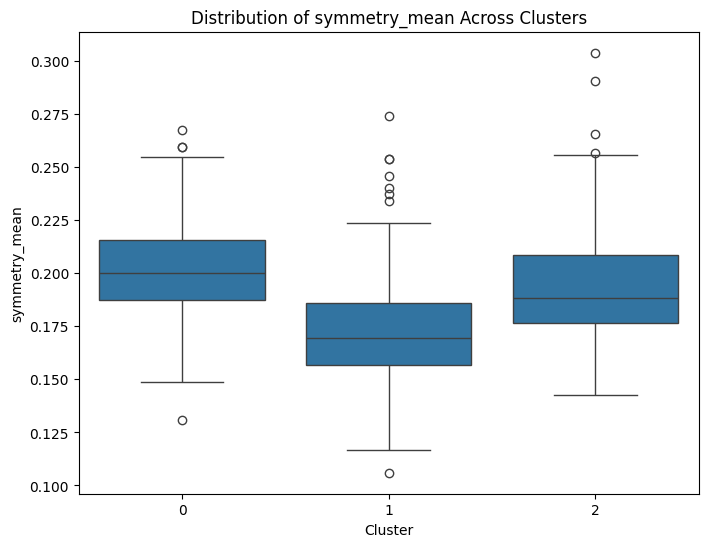

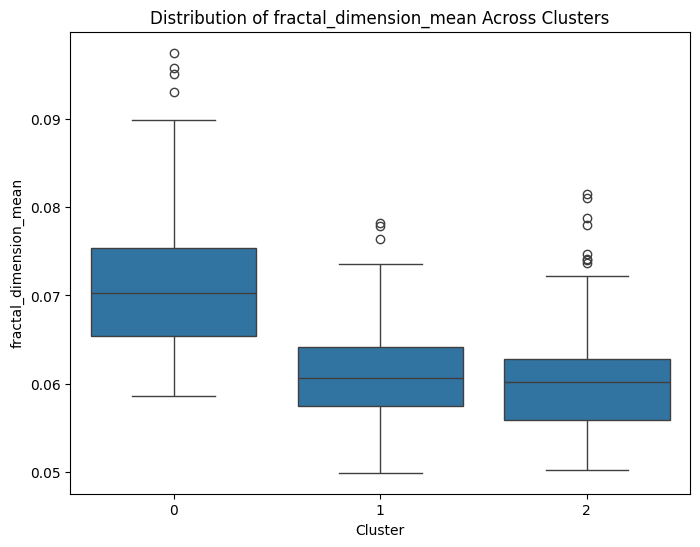

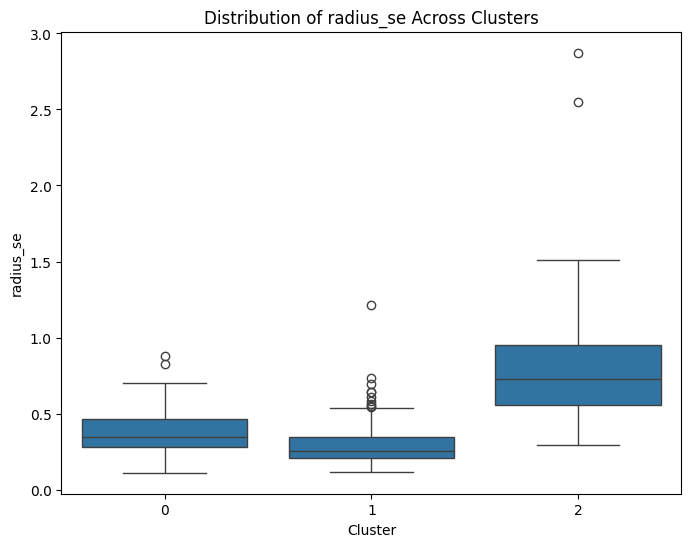

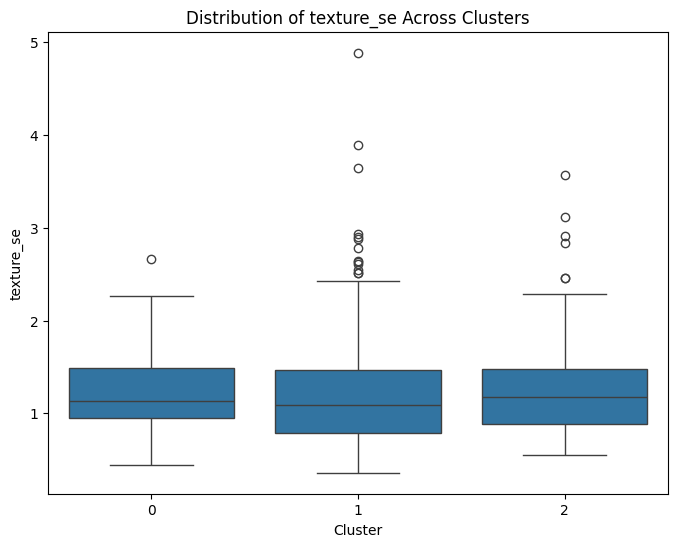

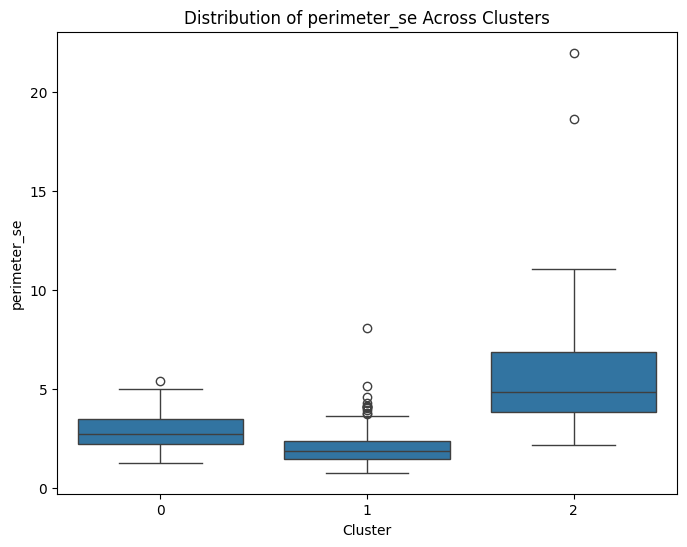

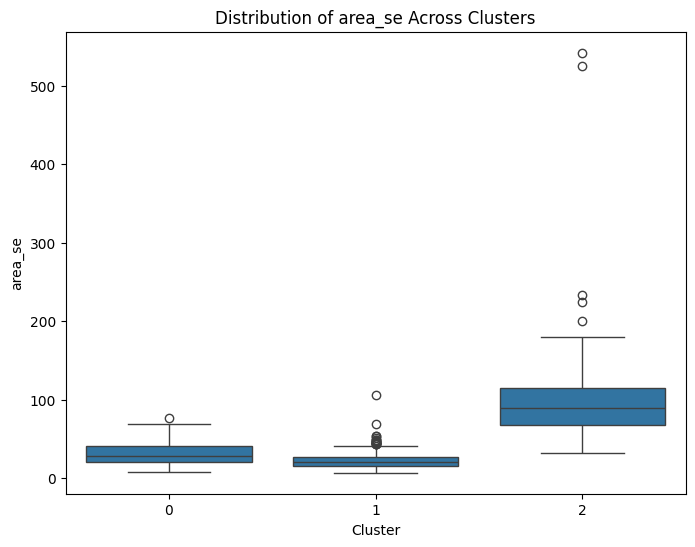

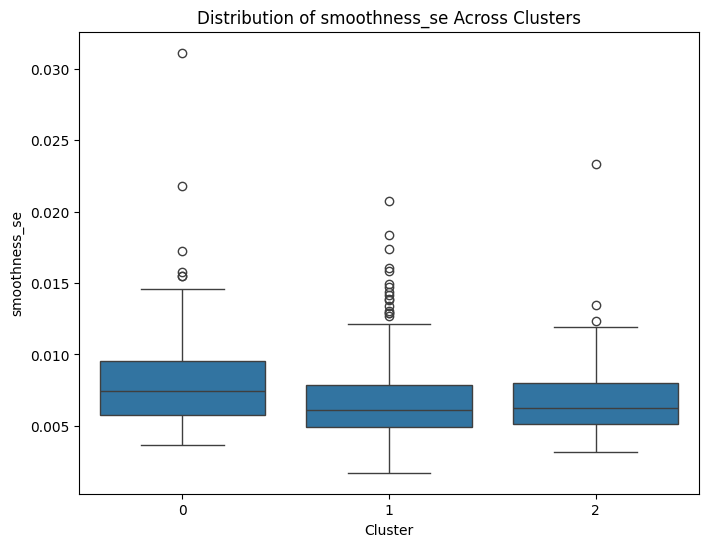

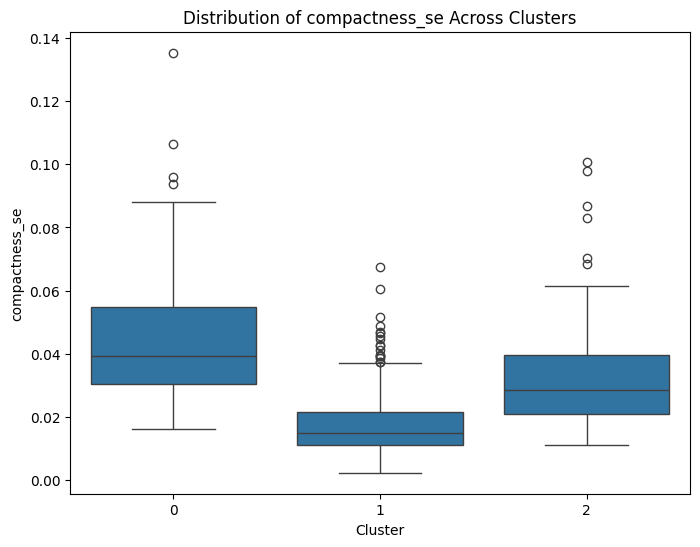

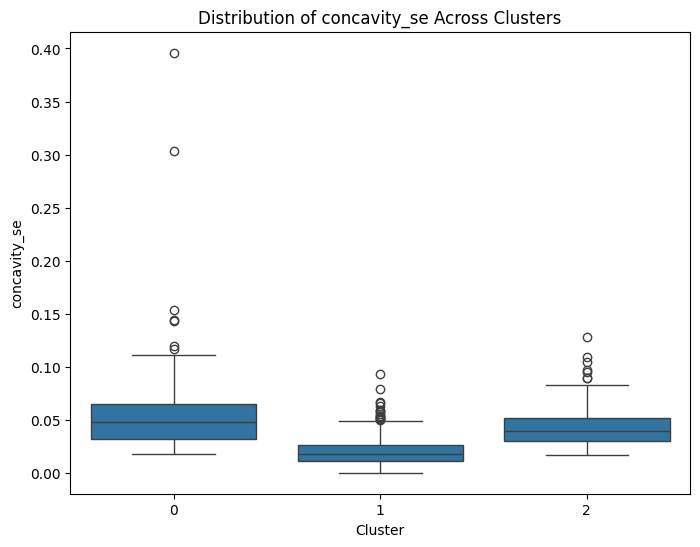

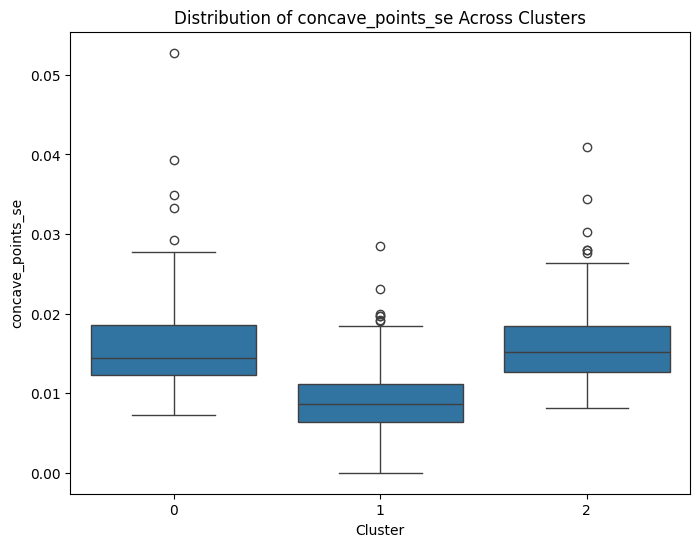

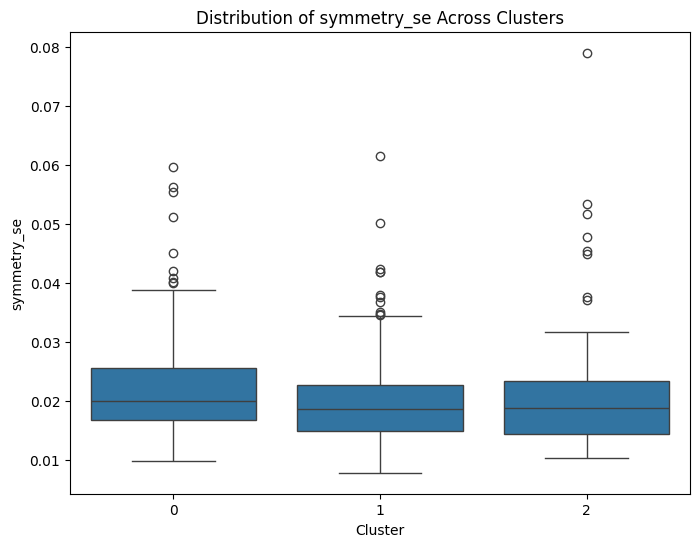

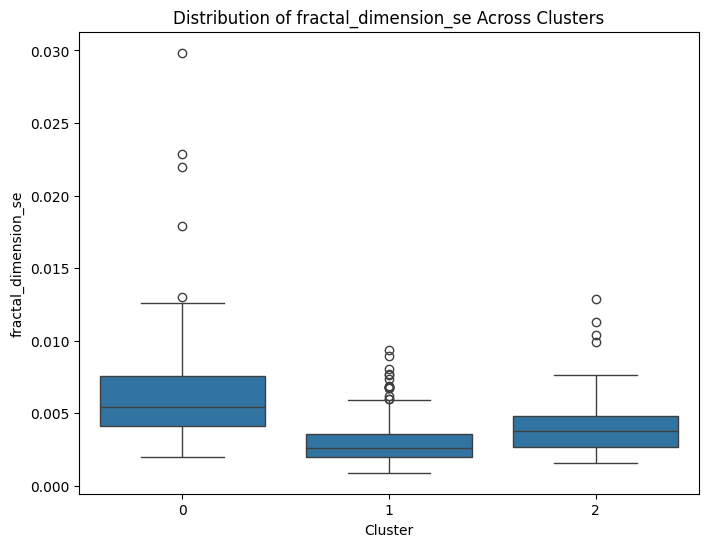

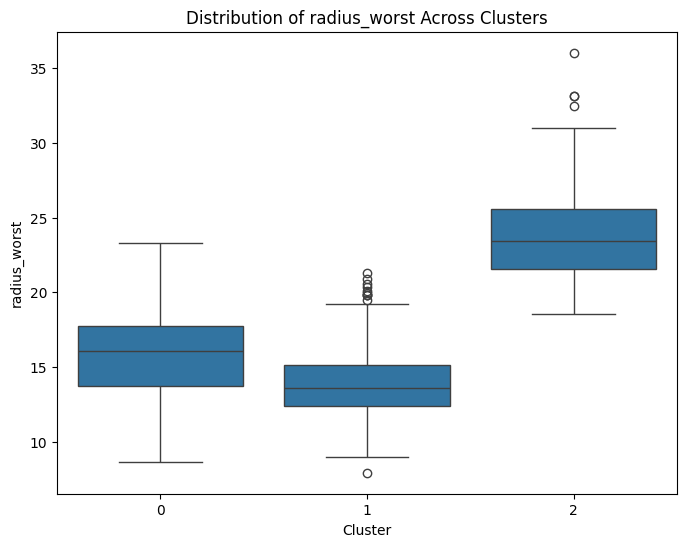

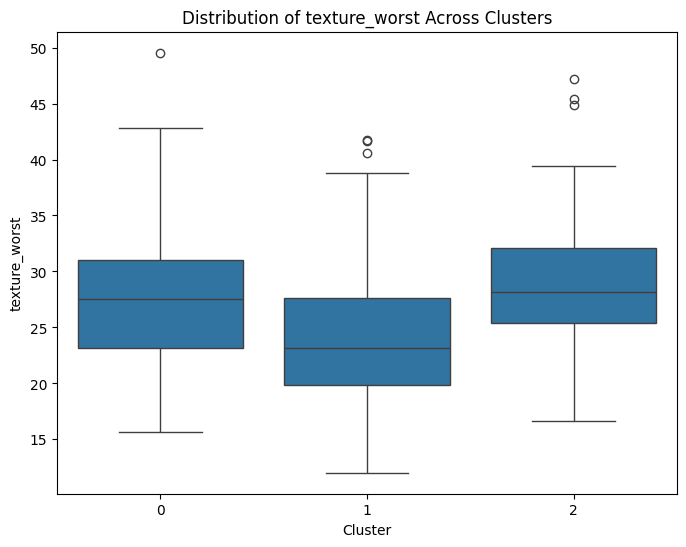

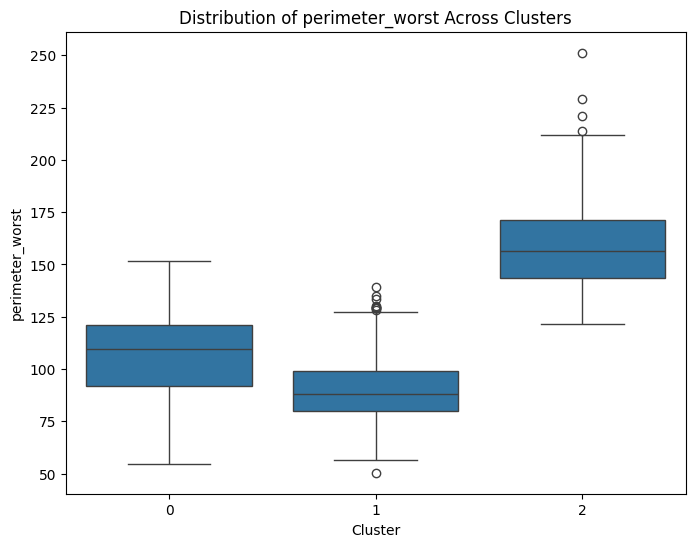

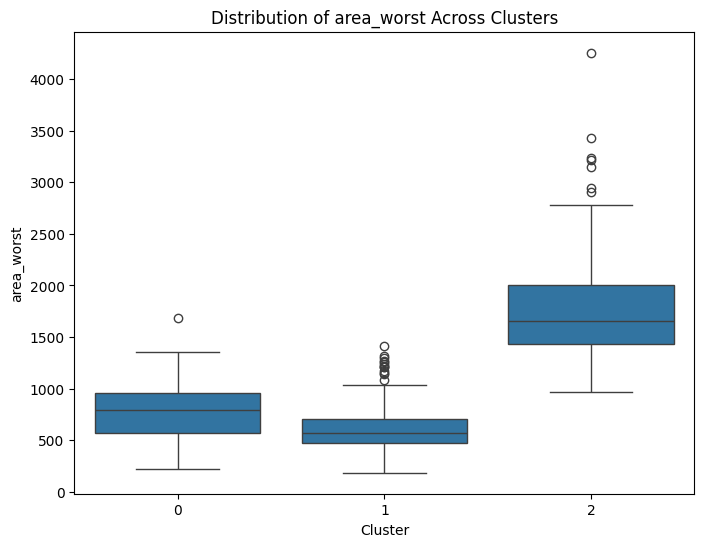

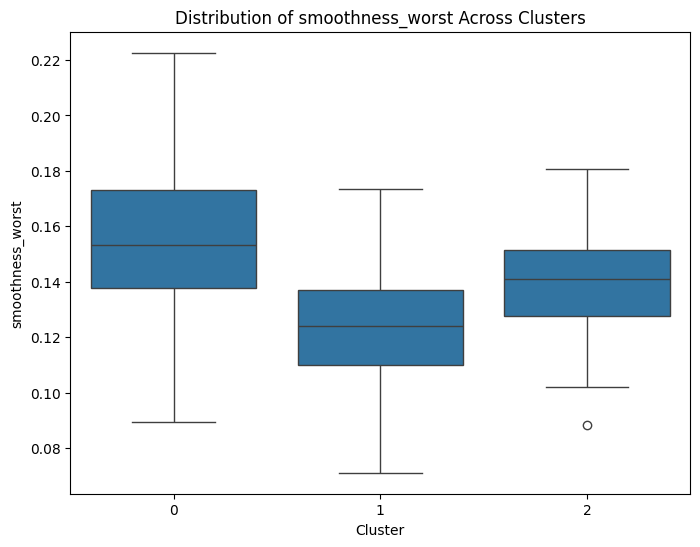

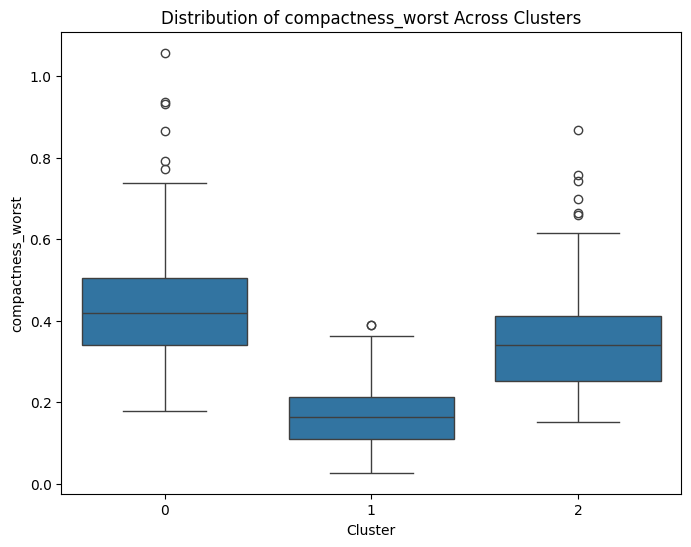

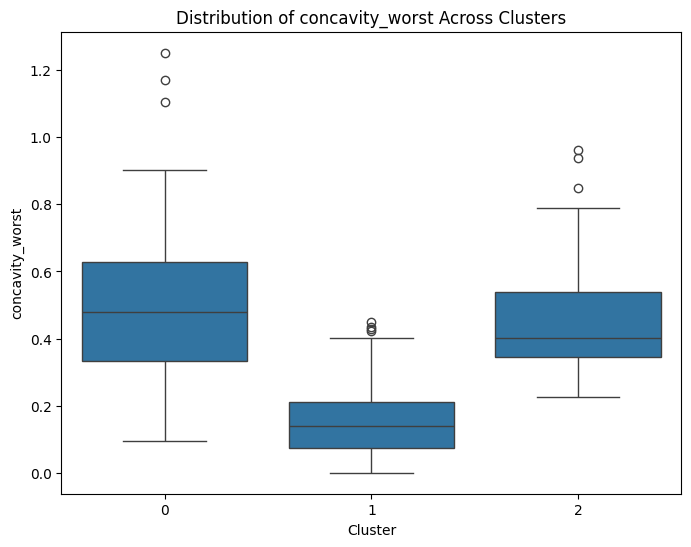

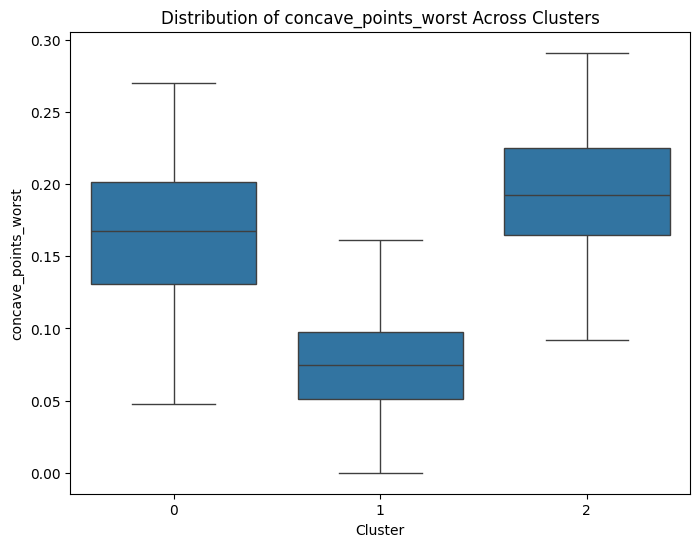

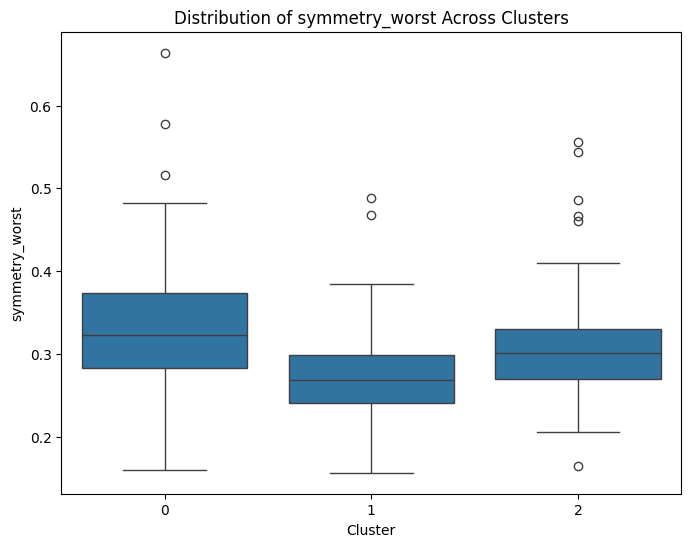

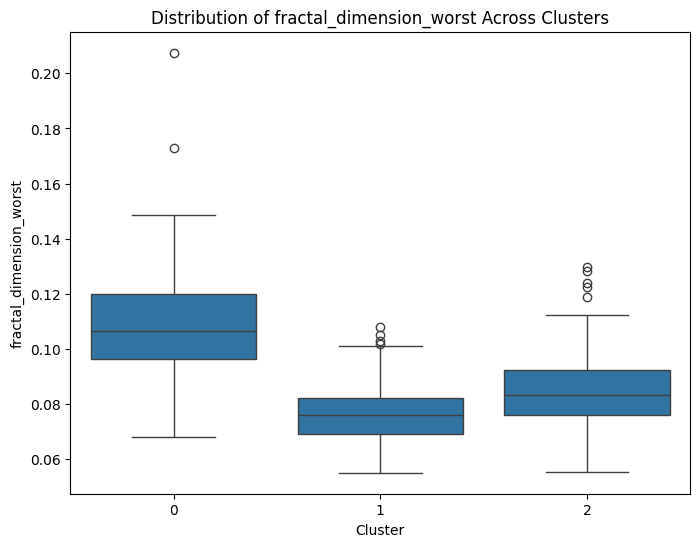

In [23]:
# List of numeric features (excluding Cluster)
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Ploting each numeric feature grouped by clusters
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Cluster Profiles:
                    id  radius_mean  texture_mean  perimeter_mean    area_mean  \
Cluster                                                                         
0        3.256264e+07    13.422608     20.046392       88.885773   568.813402   
1        2.492322e+07    12.494480     18.221412       80.189576   492.320621   
2        4.491675e+07    19.605000     21.872288      129.841949  1213.351695   

         smoothness_mean  compactness_mean  concavity_mean  \
Cluster                                                      
0               0.108271          0.159536        0.150794   
1               0.091253          0.073613        0.040270   
2               0.101892          0.151152        0.183427   

         concave_points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
Cluster                                      ...                                
0                   0.067774       0.201862  ...     15.726113      27.574227   
1                   0

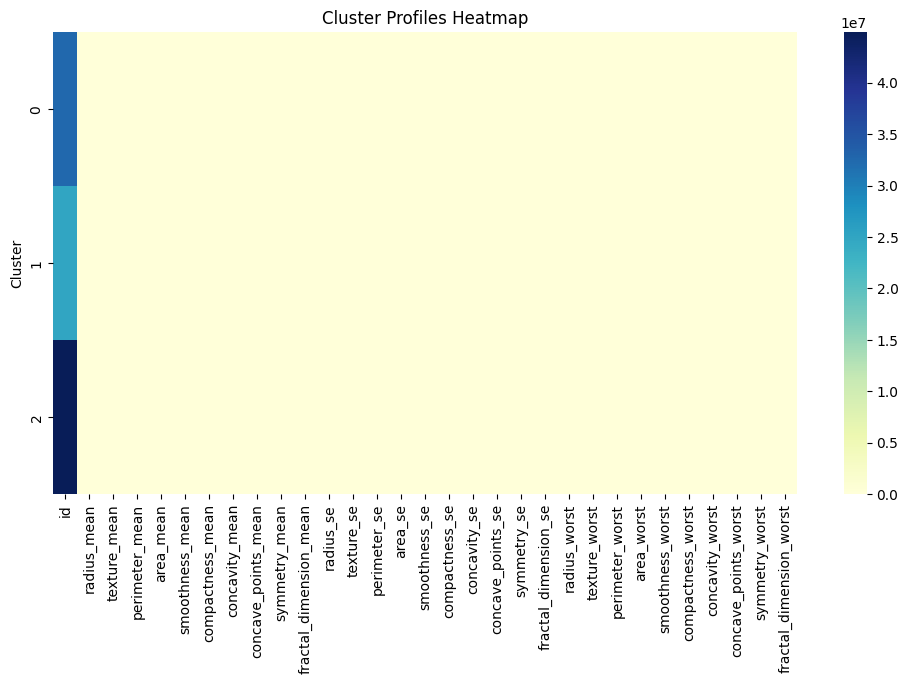

In [25]:
# Profiling and Describing Segments
def profile_segments(df, cluster_column):
    # Select only numeric columns before calculating the mean
    numeric_df = df.select_dtypes(include=['number'])
    cluster_profiles = numeric_df.groupby(cluster_column).mean()
    cluster_sizes = df[cluster_column].value_counts()
    return cluster_profiles, cluster_sizes

profiles, sizes = profile_segments(data, "Cluster")
print("Cluster Profiles:\n", profiles)
print("\nCluster Sizes:\n", sizes)

# Visualize segment profiles
plt.figure(figsize=(12, 6))
sns.heatmap(profiles, cmap="YlGnBu", annot=False)
plt.title("Cluster Profiles Heatmap")
plt.show()

In [26]:
# Selecting the Target Segment
# Define segment attractiveness criteria
criteria = {
    "Malignant_Ratio": [],
    "Cluster_Size": [],
}

for cluster in profiles.index:
    cluster_data = data[data["Cluster"] == cluster]
    malignant_ratio = cluster_data["diagnosis"].value_counts(normalize=True).get("M", 0)
    cluster_size = len(cluster_data)
    criteria["Malignant_Ratio"].append(malignant_ratio)
    criteria["Cluster_Size"].append(cluster_size)

criteria_df = pd.DataFrame(criteria, index=profiles.index)
criteria_df["Overall_Attractiveness"] = (
    criteria_df["Malignant_Ratio"] * 0.7 + criteria_df["Cluster_Size"] / data.shape[0] * 0.3
)
print("\nSegment Evaluation:\n", criteria_df)

# Select the target segment
target_segment = criteria_df["Overall_Attractiveness"].idxmax()
print("\nTarget Segment:", target_segment)



Segment Evaluation:
          Malignant_Ratio  Cluster_Size  Overall_Attractiveness
Cluster                                                       
0               0.628866            97                0.491349
1               0.093220           354                0.251897
2               1.000000           118                0.762214

Target Segment: 2


In [27]:
# Customizing the Market Segments
print("\nCustomization Strategies for Target Segment:")
print("- Focus on AI-based solutions for early detection due to high malignant ratio.")
print("- Offer specific educational programs and resources for the healthcare institutions in this cluster.")
print("- Tailor pricing and subscription models for scalability based on cluster size.")


Customization Strategies for Target Segment:
- Focus on AI-based solutions for early detection due to high malignant ratio.
- Offer specific educational programs and resources for the healthcare institutions in this cluster.
- Tailor pricing and subscription models for scalability based on cluster size.
